<a href="https://colab.research.google.com/github/Sreelekshmim123/Supervisedlearningalgorithm/blob/main/SVM_Decisiontree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SVM***(Support Vector machine)

used both classification and regression problems




construct a best descision boundarry(hyperplane) in the multidimensional space to seperate different classes

core idea is to find max marginal hyperplane that best divides into two classes

**decision boundary**
which is parrel to hyperplane and touches closest class in one side of the hyperplane

teminologies
support vectors

hyperplane

Margin perpendicular distance b/w the classes

Nonlinear inseperable planes

SVM kernel it is convert Nonlinear inseperable datas into linear seperable data we can add mathematical function is called SVM kernel



*   Linear
*   Polynomial
Radial functio







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.set_index("User ID")

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data['Purchased'].unique()

array([0, 1])

In [ ]:
x = data.drop(['User ID','Purchased'], axis=1)
y =data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [ ]:
x_test

,Gender,Age,EstimatedSalary
209,0,46,22000
280,0,59,88000
33,0,28,44000
210,0,48,96000
93,0,29,28000
...,...,...,...
246,0,35,50000
227,1,56,133000
369,0,54,26000
176,0,35,47000


In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()

In [ ]:
svm_clf.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svm_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
print('Accureacy =',accuracy_score(y_test,y_pred))

Accureacy = 0.7375


In [ ]:
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [18, 10]])

In [ ]:
print('Prescision score ',precision_score(y_test,y_pred))
print('recall score',recall_score(y_test,y_pred))
print("f1 score",f1_score(y_test,y_pred))

Prescision score  0.7692307692307693
recall score 0.35714285714285715
f1 score 0.48780487804878053


In [ ]:
svm_clf1 = SVC(kernel='linear')
svm_clf1.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
ypredlinear = svm_clf1.predict(x_test)

In [ ]:
print('Accureacy =',accuracy_score(y_test,ypredlinear))

Accureacy = 0.85


In [ ]:
svm_clf2 = SVC(kernel='poly',degree=3)
svm_clf2.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
ypredpoly = svm_clf2.predict(x_test)

In [ ]:
print('Accureacy =',accuracy_score(y_test,ypredpoly))

Accureacy = 0.725


**Decision Tree**

Supervised learning algorithm

CART(Classification And Regression Tree)

Solve the problem using tree repersentation

Termonolgies in descion tree

Root node,branch,descsion node

Information gain


1.   Statistical measure
2.   how given attribute seperate well





Entropy


1.   Measure of impurity of the i/p set
2.   IG is decrease of the entrophy




In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preddesc =dt_clf.predict(x_test)

In [ ]:
print('Accuracy =',accuracy_score(y_test,y_preddesc))

Accuracy = 0.825


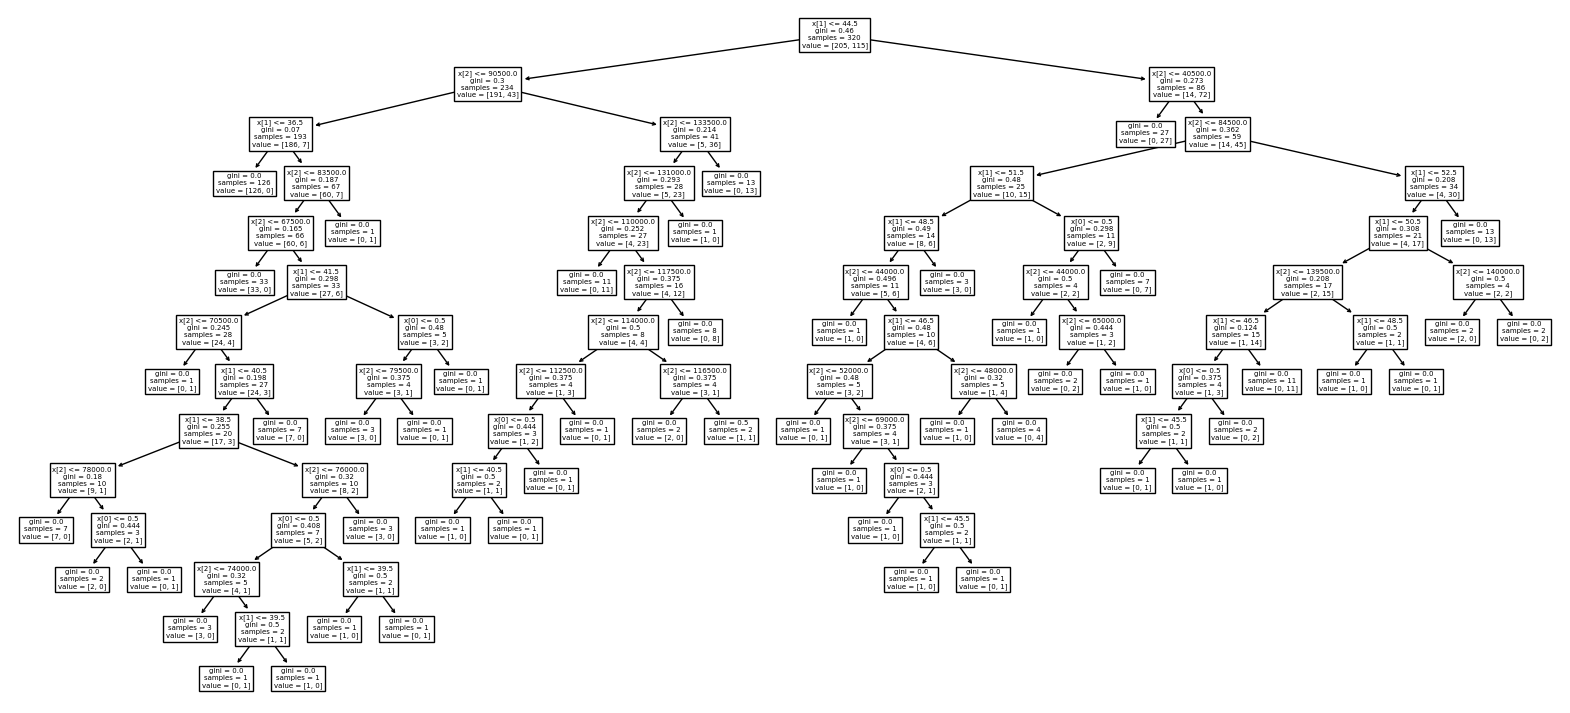

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(dt_clf)
plt.show()

In [ ]:
confusion_matrix(y_test,y_preddesc)

array([[46,  6],
       [ 8, 20]])

**Random Forest Model**


1.   Ensemble model:Combining multiple model
2.   Supervised learning alg
3.   It is a bagging method:which is combining multiple model and get better result
4.   both for classification and regression



In bagging each tree are independent



*   Select random k data pointsfrom the dtraining set
*   built the decision tree
*   chooose the N number of descion tree
* Repeat step 1 & 2
* for new data points find prediction with majority



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rtclf = RandomForestClassifier()
rtclf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
ypredrt  =rtclf.predict(x_test)

In [ ]:
accuracy_score(y_test,ypredrt)

0.9

In [ ]:
confusion_matrix(y_test,ypredrt)

array([[47,  5],
       [ 3, 25]])

In [ ]:
rtclf1 = RandomForestClassifier(n_estimators=50,max_depth=20,criterion='entropy')


In [ ]:
rtclf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50)

In [ ]:
ypredrt1  =rtclf1.predict(x_test)

In [ ]:
accuracy_score(y_test,ypredrt1)

0.8875

In [ ]:
confusion_matrix(y_test,ypredrt1)

array([[47,  5],
       [ 4, 24]])